# ANN & MNIST : exercise
---

## 라이브러리 불러오기

In [48]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd

from sklearn.metrics import accuracy_score

## 데이터 불러오기

In [49]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

In [50]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [51]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

id = 0
다음 그림은 숫자 5 입니다.


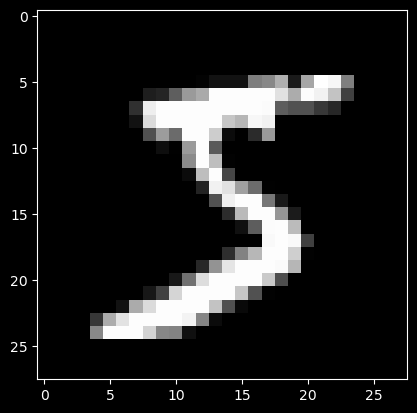

In [52]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

# id = rd.randrange(0,10000)
id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap='gray')
plt.show()

## 데이터 전처리

* reshape

In [56]:
train_x = train_x.reshape([train_x.shape[0], -1])
test_x = test_x.reshape([test_x.shape[0], -1])

In [57]:
train_x.shape

(60000, 784)

* min-max scaling

In [32]:
max_num = train_x.max()

# originally: train_x = (train_x + min_num) / (max_num + min_num)
train_x = train_x / max_num
test_x = test_x / max_num

In [33]:
train_x.max(), train_x.min(), test_x.max(), test_x.min()

(1.0, 0.0, 1.0, 0.0)

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

train_x.max(), train_x.min(), test_x.max(), test_x.min()

(1.0, 0.0, 24.0, 0.0)

In [ ]:
train_x.max(), train_x.min(), test_x.max(), test_x.min()

(1.0, 0.0, 1.0, 0.0)

* target feature : One-hot Encoding

In [34]:
from tensorflow.keras.utils import to_categorical

len_y = len(set(train_y))

train_y = to_categorical(train_y, len_y)
test_y = to_categorical(test_y, len_y)

train_y.shape

(60000, 10)

## 모델링 I

1. Sequential, Functional 아무 것이나!
2. 히든레이어 없이 epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [35]:
train_x.shape, train_y.shape

((60000, 28, 28), (60000, 10))

In [ ]:
########################
# 모델링 I : .fit( ) 까지!
########################
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Input(shape= (28, 28)))
model.add(keras.layers.Flatten())       # 다차원 데이터를 1차원으로 쭉 늘려주는 역할
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              metrics= ['accuracy'],
              optimizer= 'adam')

model.summary()

In [47]:
########################
# 모델링 I : .fit( ) 까지!
########################
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Input(shape= (train_x.shape[1])))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              metrics= ['accuracy'],
              optimizer= 'adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [48]:
from tensorflow.keras.callbacks import EarlyStopping 

es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 5,
                   verbose = 1,
                   restore_best_weights = True)

In [49]:
model.fit(train_x, train_y,
          validation_split = 0.2,
          callbacks= [es],
          verbose = 1,
          epochs = 50)

Epoch 1/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5083 - accuracy: 0.8705 - val_loss: 0.3188 - val_accuracy: 0.9103
Epoch 2/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3180 - accuracy: 0.9115 - val_loss: 0.2896 - val_accuracy: 0.9172
Epoch 3/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2929 - accuracy: 0.9175 - val_loss: 0.2751 - val_accuracy: 0.9241
Epoch 4/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2814 - accuracy: 0.9212 - val_loss: 0.2707 - val_accuracy: 0.9239
Epoch 5/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2737 - accuracy: 0.9235 - val_loss: 0.2673 - val_accuracy: 0.9273
Epoch 6/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2682 - accuracy: 0.9252 - val_loss: 0.2645 - val_accuracy: 0.9277
Epoch 7/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2644 - accuracy: 0.9249 - val_loss: 0.2633 - val_accuracy:

In [50]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

313/313 [==============================] - 0s 900us/step


In [51]:
single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 93.02%
테스트 정확도 : 92.62%


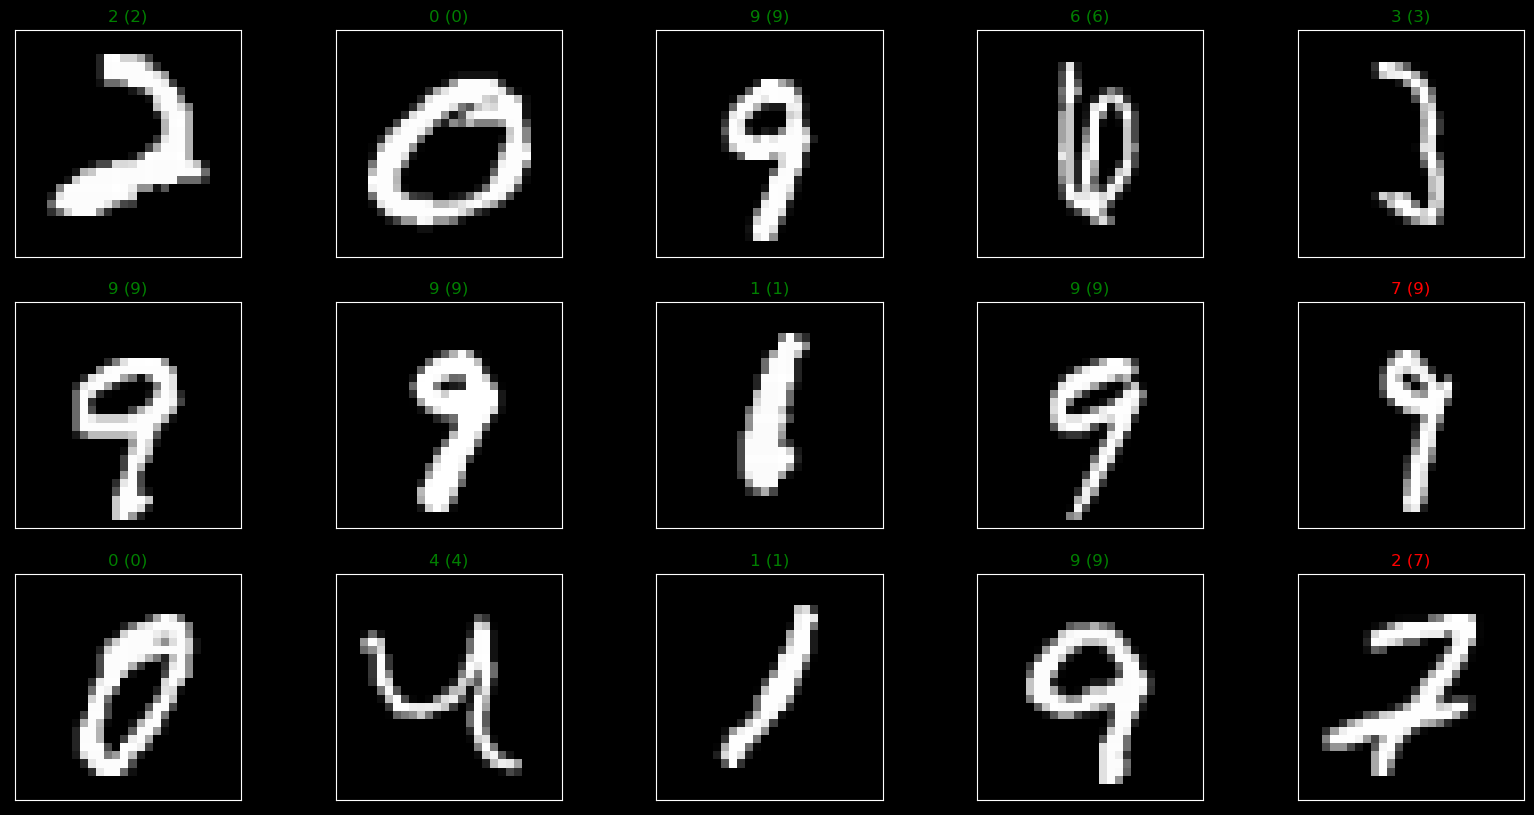

In [52]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 6426
다음 그림은 숫자 0 입니다.
모델의 예측 : 6
모델의 카테고리별 확률 : [ 9.  0.  1.  0.  0.  0. 89.  0.  0.  0.]
틀렸어요


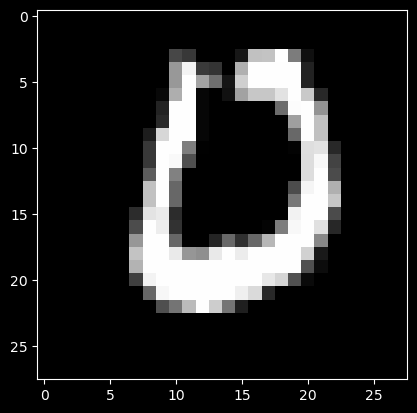

In [53]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [54]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 0s 1ms/step - loss: 0.2704 - accuracy: 0.9262


[0.27036452293395996, 0.9261999726295471]



---



## 모델링 II

1. Sequential, Functional 아무 것이나!
2. 히든레이어 3개 이상 쌓고, epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [26]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

In [39]:
#########################
# 모델링 II : .fit( ) 까지!
#########################
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Input(shape = (28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(loss = keras.losses.categorical_crossentropy,
              metrics = ['accuracy'],
              optimizer = 'adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [41]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 5,
                   verbose = 1,
                   restore_best_weights = True)

In [42]:
model.fit(train_x, train_y,
          validation_split = 0.2,
          callbacks = [es],
          epochs = 50,
          verbose = 1)

Epoch 1/50
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2534 - accuracy: 0.9240 - val_loss: 0.1257 - val_accuracy: 0.9609
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1080 - accuracy: 0.9666 - val_loss: 0.1206 - val_accuracy: 0.9653
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0752 - accuracy: 0.9764 - val_loss: 0.0964 - val_accuracy: 0.9722
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0608 - accuracy: 0.9804 - val_loss: 0.1140 - val_accuracy: 0.9677
Epoch 5/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0470 - accuracy: 0.9848 - val_loss: 0.1050 - val_accuracy: 0.9704
Epoch 6/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0400 - accuracy: 0.9875 - val_loss: 0.1115 - val_accuracy: 0.9737
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0343 - accuracy: 0.9885 - val_loss: 0.1070 - val_accuracy:

In [43]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

313/313 [==============================] - 1s 2ms/step
트레이닝 정확도 : 98.18%
테스트 정확도 : 97.41%


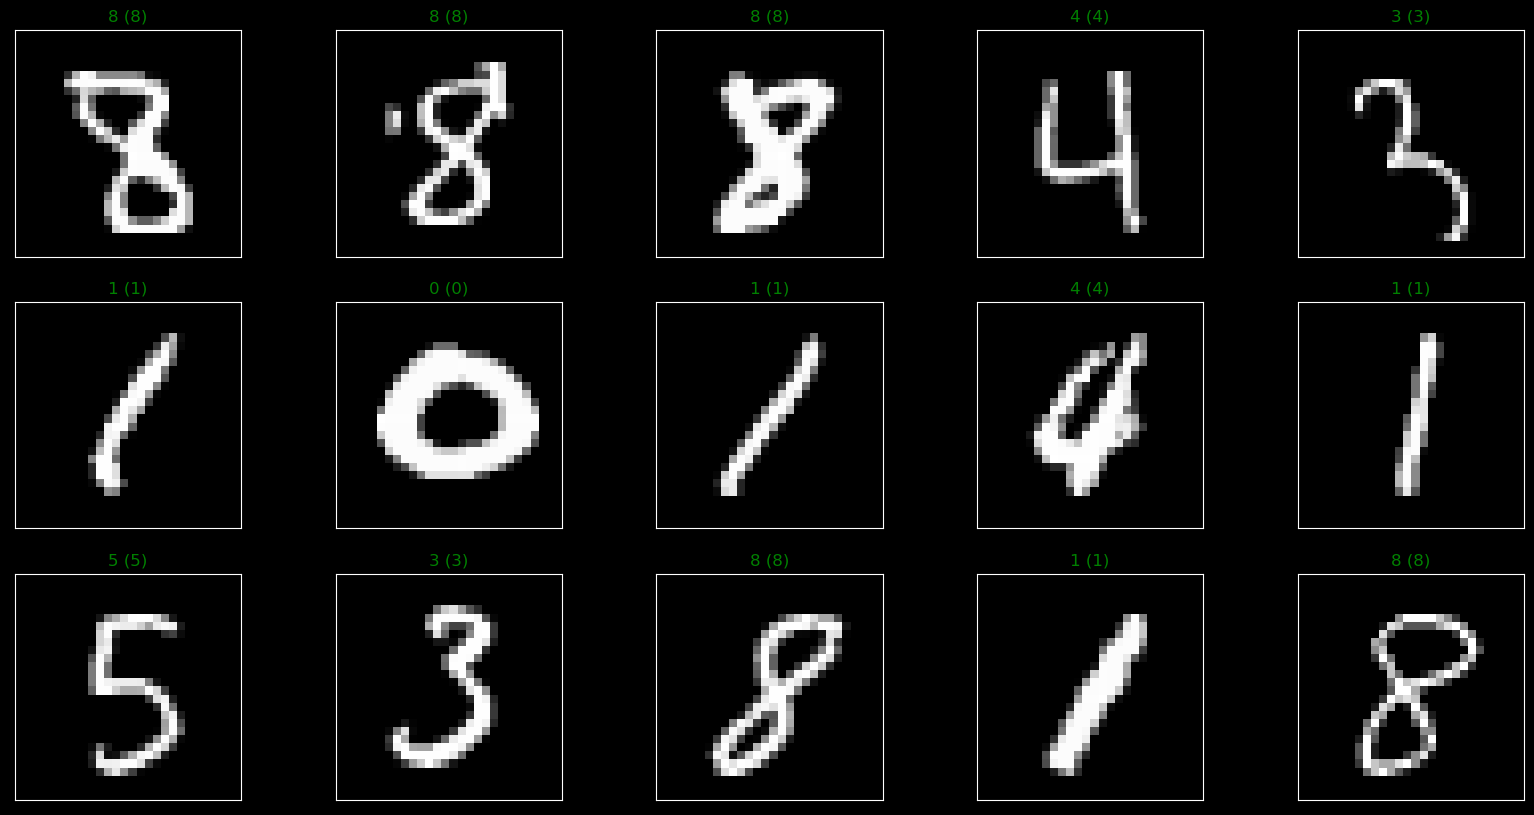

In [44]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 1530
다음 그림은 숫자 8 입니다.
모델의 예측 : 7
모델의 카테고리별 확률 : [ 0.  0.  0. 14.  0.  0.  0. 83.  0.  0.]
틀렸어요


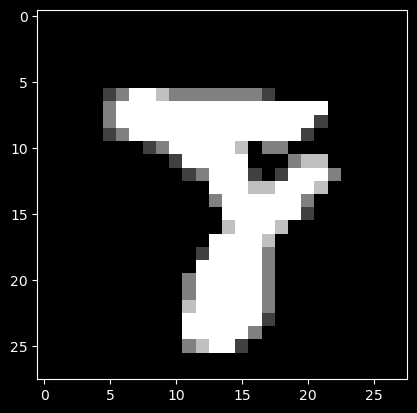

In [45]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [46]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0888 - accuracy: 0.9741


[0.0887870341539383, 0.9740999937057495]